Completely new structure

In [3]:
from discretize import TensorMesh
from discretize.utils import random_model
from wbi.src import wavelet_regularization as regularization
import matplotlib.pyplot as plt
import numpy as np
import importlib

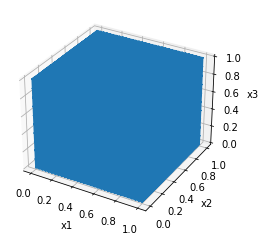

(<matplotlib.collections.QuadMesh at 0x209abe55048>,)

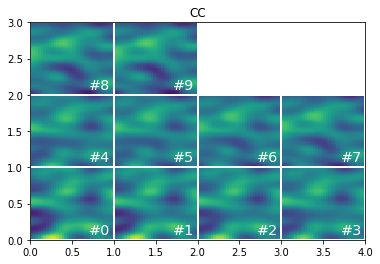

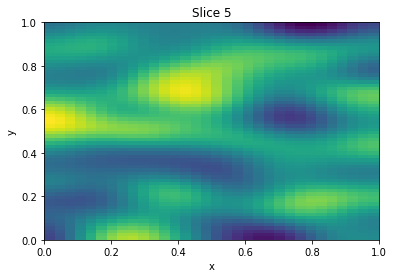

In [7]:
nParam = 32  # Number of model paramters

# A 1D mesh is used to define the row-space of the linear operator.
mesh = TensorMesh([nParam,nParam*2, 10])
mesh.plot_grid()
plt.show()

model = random_model(shape=(nParam, nParam*2, 10), seed=15,its=40)
# model = np.ones((nParam, nParam*2,10))
# model[5:13,:,:] = 0
model = model.reshape(-1,1, order='F').flatten()
mesh.plot_image(model)
mesh.plot_slice(model)

In [9]:
importlib.reload(regularization)
reg = regularization.WaveletRegularization(mesh)
reg(model)

model.shape

(<matplotlib.collections.QuadMesh at 0x1edb20eb048>,)

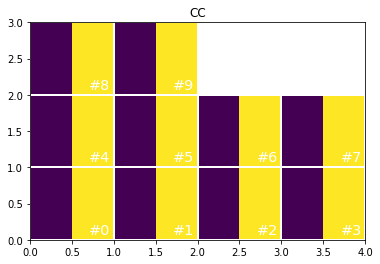

In [192]:
for i in np.arange(1000):
    model = model - 0.0001*reg.deriv(model)
mesh.plot_image(model)